# Лабораторная работа 3

## Сингулярное разложение и его приложения

Напомним, что сингулярным разложением (SVD, Singular value decomposition) матрицы $A$ размера $m\times n$ называется представление

$$A = U\Sigma V^T,$$

где $U$ — ортогональная матрица размера $m\times m$, $V$ — ортогональная матрица размера $n\times n$, $\Sigma = \mathrm{diag}(\sigma_1,\sigma_2,\sigma_3,\ldots)$ — диагональная матрица размера $m\times n$, в которой $\sigma_1\geqslant\sigma_2\geqslant\ldots\geqslant0$.

На самом деле требование, чтобы матрицы $U$ и $V$ были квадратными, избыточно. *Усечённым сингулярным разложением* мы будем называть разложение

$$A = U\Sigma V^T,$$

где $U$ и $V$ — матрицы с ортонормированными столбцами размеров $m\times k$ и $n \times k$ соответственно, $\Sigma$ — диагональная матрица размера $k\times k$, где $k = \min(m,n)$. Далее мы будем работать исключительно с усечённым разложением.

### Сжатие данных с помощью SVD = построение низкорангового приближения

Введём *норму Фробениуса* матрицы как

$$||A||_{frob} = \sqrt{\mathrm{tr}{A^TA}} = \sqrt{\sum\limits_{i,j}a^2_{i,j}}$$

Иными словами, это обычное евклидово расстояние на пространстве, которое получается, если все матрицы вытянуть в длинные векторы.

Зададимся вопросом: как найти матрицу $A_{r}$ ранга $r$, наименее отличающуюся от $A$ по норме Фробениуса (то есть для которой норма разности $||A - A_{r}||_{frob}$ минимальна). Оказывается, это можно сделать с помощью сингулярного разложения:

**Теорема.** Пусть $\Sigma_{r}$ — это матрица, полученная из $\Sigma$ заменой диагональных элементов $\sigma_{i}$ ($i > r$) нулями, тогда $A_{r} = U\Sigma_{r}V^T$.

Это можно переписать и в более экономичном виде. Если

$$A = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1k}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mk}
\end{pmatrix}}_{=U}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \sigma_{2} & \\
 & & \ddots
\end{pmatrix}}
}_{=\Sigma}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1k} & \ldots & v_{nk}
\end{pmatrix}}_{=V^T}$$

то

$$A_{r} = \underbrace{
\begin{pmatrix}
u_{11} & \ldots & u_{1r}\\
\vdots & & \vdots\\
u_{m1} & \ldots & u_{mr}
\end{pmatrix}}_{=U_r}\cdot\underbrace{{
\begin{pmatrix}
\sigma_{1} & &\\
 & \ddots & \\
 & & \sigma_{r}
\end{pmatrix}}
}_{=\Sigma_r}\cdot \underbrace{
\begin{pmatrix}
v_{11} & \ldots & v_{n1}\\
\vdots & & \vdots\\
v_{1r} & \ldots & v_{nr}
\end{pmatrix}}_{=V^T_r}$$

При этом

$$||A - A_{r}||_{frob} = \sqrt{\sum\limits_{i\geqslant r+1} \sigma_{i}^2}$$

Если сингулярные значения матрицы падают достаточно быстро (а в реальных задачах часто бывает именно так), то норма разности будет малой при сравнительно небольшом значении $r$.

На хранение исходной матрицы нам требовалось $m\times n$ памяти. Теперь же, если мы будем хранить отдельно $U_r$, $V_r$ и диагональные элементы $\Sigma_r$, затраты памяти составят $mr + nr + r = r(m + n + 1)$.

**Разложение на компоненты ранга 1**

Обозначим через $u_1,\ldots, u_k$ столбцы матрицы $U$, а через $v_1, \ldots, v_k$ столбцы матрицы $V$. Тогда имеет место равенство

$$A = u_1\sigma_{1}v_1^T + u_2\sigma_{2}v_2^T + u_3\sigma_{3}v_3^T + \ldots$$

Матрицу $u_k\sigma_{k}v_k^T = \sigma_{k}u_kv_k^T$ мы будем называть $k$-й компонентой ранга 1 матрицы $A$. Отметим, что слагаемые в этой сумме ортогональны относительно скалярного произведения $(X, Y) = \mathrm{tr}(X^TY)$ (порождающего норму Фробениуса).

Как нетрудно заметить,

$$A_{r} = \sigma_{1}u_1v_1^T + \sigma_{2}u_2v_2^T + \ldots + \sigma_{r}u_rv_r^T$$

**Технические детали (SVD в Питоне)**

Есть несколько способов сделать в Питоне сингулярное разложение; мы пока предлагаем Вам использовать

`import scipy.linalg as sla`

`U, S, Vt = sla.svd(X, full_matrices=False)`

Для ознакомления с особенностями этой функции рекомендуем обратиться к [документации](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.svd.html) (в частности, обратите внимание на то, какие именно объекты она возвращает).

### Правила оформления графиков

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. 

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

Ещё одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- для точек из разных выборок, необходимо использовать разные цвета;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- размер графика должен быть таким, чтобы по нему несложно было сделать необходимые выводы о данных;
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).

Помните, что проверяющий имеет право снизить оценку за неопрятные графики.

### Оценивание

Обратите внимание, что в каждом разделе есть задания на написания кода и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если Вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то в подавляющем большинстве случаев баллы за такое выставлены не будут.

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-linregr-Username.ipynb, где Username — Ваша фамилия.

### Задание 1. Сжатие данных с помощью SVD

Загрузите выложенную на странице курса фотографию.

In [2]:
import seaborn as sns

In [76]:
import numpy as np
from skimage.io import imread

img = imread(r'chain_small.JPG')
img = img.mean(axis=2) # это матрица из интенсивностей серого цвета; её уже можно подвергать SVD

Нарисуйте картинку:

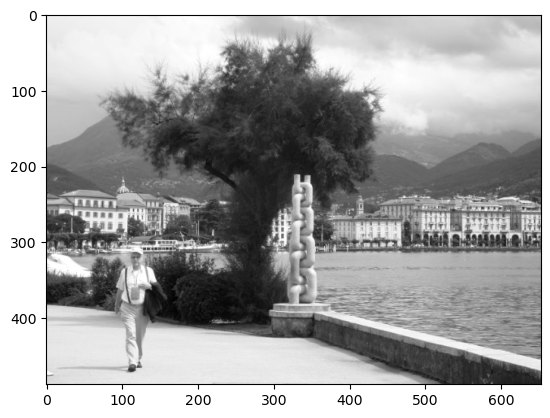

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline

imgplot = plt.imshow(img, cmap='gray')

Постройте сингулярное разложение этой матрицы.

In [78]:
from numpy.linalg import svd

U, S, VT = svd(img, full_matrices=False)

**1. [0.1 балла]** Нарисуйте график диагональных элементов матрицы $\Sigma$:

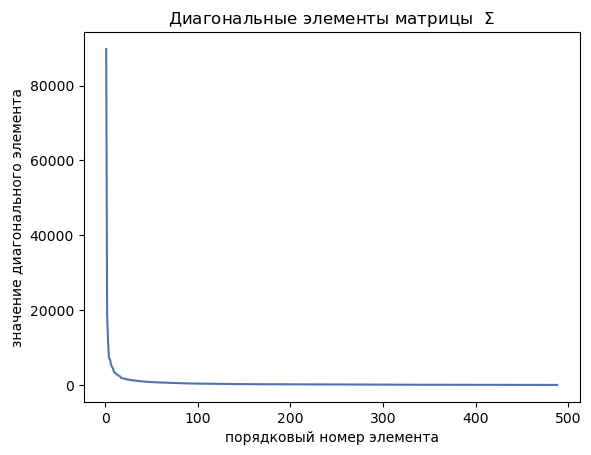

In [79]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
nums = [i + 1 for i in range(len(S))]
plt.plot(nums, S)
plt.xlabel(r'порядковый номер элемента')
plt.ylabel(r'значение диагонального элемента')
plt.title(r'Диагональные элементы матрицы  $Σ$')
plt.show()

Кажется, что они убывают достаточно быстро и есть надежда, что первые несколько компонент дадут картинку, близкую к исходной.

**Важно:** при визуализации различных компонент в этом задании используйте только матричные операции. В частности, избегайте циклов, функций `map` и `reduce`, а также специальных функций, находящих суммы компонент.

**2. [0.1 балла]** Визуализуйте первую компоненту ранга 1. Ожидали ли Вы увидеть именно это? Поясните.

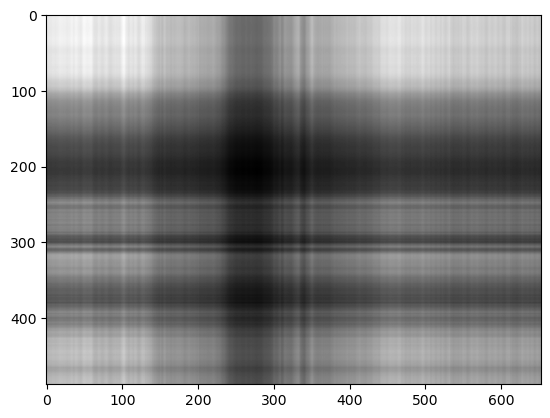

In [80]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
c1 =  S[0] * U[:, 0].reshape(-1, 1) @ VT[0, :].reshape(1,-1)

# VT[0, :].reshape(1,-1)
# U[:, 0].reshape(-1, 1)

c1plot = plt.imshow(c1, cmap='gray')

В целом, ожидалось увидеть именно это, поскольку первая компонента вносит наибольший вклад в изображение - стала намечена структура, условно выделены места, на которые попадают смысловые объекты, но границ объектов и их "контура" еще нет

**3. [0.5 балла]** Визуализуйте суммы компонент ранга 1 с первой по двадцатую, с первой по пятидесятую, с двадцатой по сотую, с двадцатой по последнюю. Сделайте выводы.

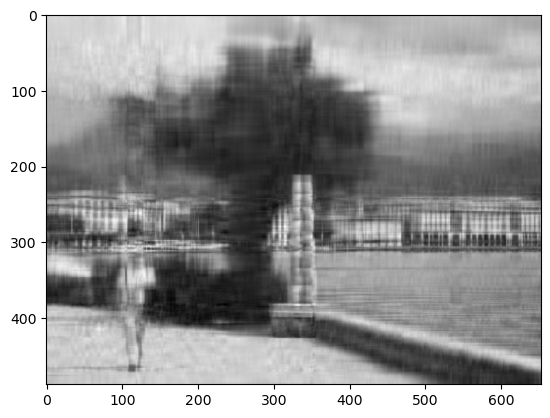

In [81]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
c1_20 =  S[0:20] * U[:, 0:20].reshape(-1, 20) @ VT[0:20, :].reshape(20,-1)
c1_20plot = plt.imshow(c1_20, cmap='gray')

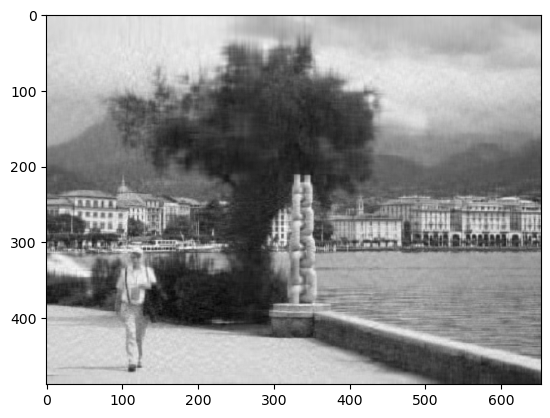

In [82]:
c1_50 =  S[0:50] * U[:, 0:50].reshape(-1, 50) @ VT[0:50, :].reshape(50,-1)
c1_50plot = plt.imshow(c1_50, cmap='gray')

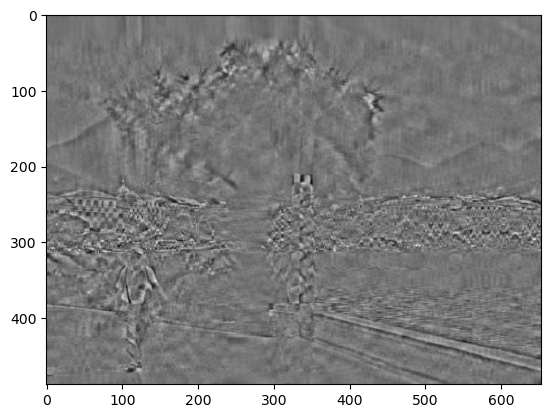

In [83]:
c20_100 =  S[19:100] * U[:, 19:100].reshape(-1, 81) @ VT[19:100, :].reshape(81,-1)
c20_100plot = plt.imshow(c20_100, cmap='gray')

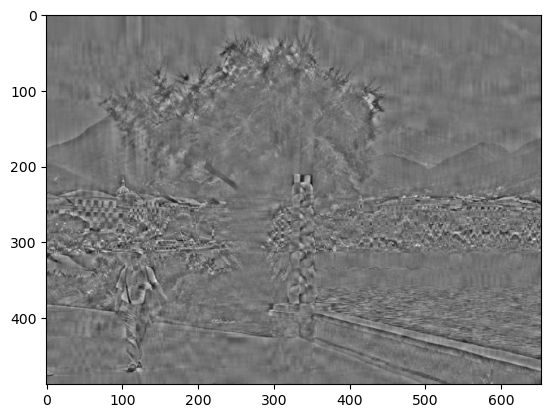

In [84]:
dim1 = U.shape[0] - 19
c20_last =  S[19:] * U[:, 19:].reshape(-1, dim1) @ VT[19:, :].reshape(dim1,-1)
c20_last_plot = plt.imshow(c20_last, cmap='gray')

Первые компоненты обозначают самые важные объекты на картинке, впоследствии добавление компонент к предыдущим вносит только какие-то детали. Более того, чем больше порядковый номер компоненты, тем меньше вклада она вносит, ведь изображения, получившиеся при построении с 20ой компоненты по 100ую и с 20ой по последнюю практически идентичны.

**4. [0.35 балла]** Как Вам кажется, какие компоненты нужно взять для достаточно хорошего восстановления исходного изображения? Аргументируйте свой ответ. Не забудьте визуализировать сумму выбранных компонент.

*Комментарий: для получения полного балла за это задания постарайтесь привести более убедительный аргумент, нежели Ваши субъективные впечатления от сравнения полученного изображения с исходным.*

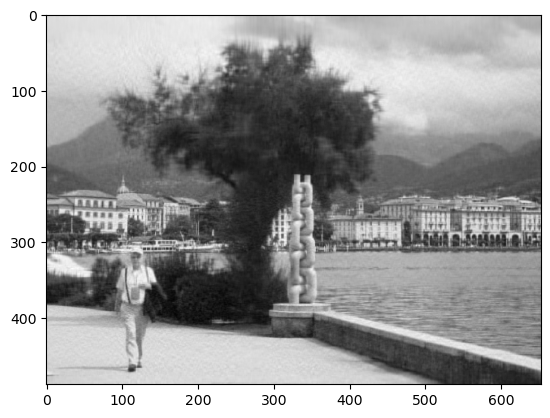

In [85]:
c1_50 =  S[0:80] * U[:, 0:80].reshape(-1, 80) @ VT[0:80, :].reshape(80,-1)
c1_50plot = plt.imshow(c1_50, cmap='gray')

In [86]:
r = S.shape[0]

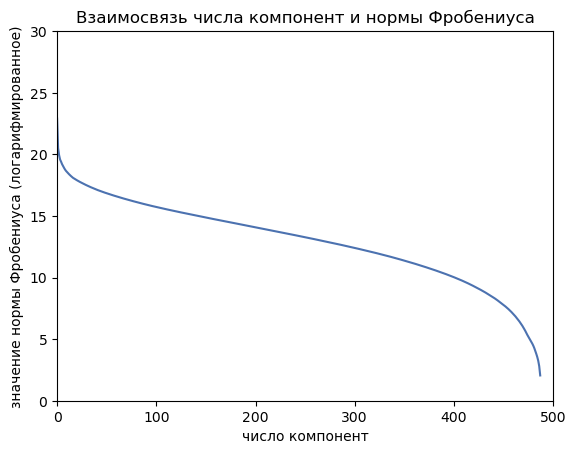

In [87]:
x = [i for i in range(r)]
sum_error = sum([S[i] ** 2 for i in range(r)])
frob_norm = [sum_error]
for i in range(r):
    frob_norm.append(frob_norm[-1] - S[i] ** 2)
plt.plot(x, [np.log(j) for j in frob_norm[:-1]])
plt.ylim([0, 30])
plt.xlim([0, 500])
plt.xlabel(r'число компонент')
plt.ylabel(r'значение нормы Фробениуса (логарифмированное)')
plt.title(r'Взаимосвязь числа компонент и нормы Фробениуса')
plt.show()

Во-первых, точно нужно брать *первые* n компонент, поскольку они вносят наибольший вклад в "смысл" изображения. Во-вторых, по графику логарифмированной нормы Фробениуса видно, что, начиная с ~80 прирост не такой сильный, а накопленные компоненты дают достаточно большой вклад, а значит качество изображения достаточно хорошее 

**5. [0.15 балла]** Во сколько раз меньше памяти (теоретически) потребуется для хранения нового изображения по сравнению с исходным?

In [88]:
U.shape

(488, 488)

In [89]:
VT.shape

(488, 653)

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ\
Изначально затрачивается m x n памяти
При усеченном сингулярном разложении будет затрачиваться m x k + k + k x n = k(m + 1 + n) памяти

Учитывая, что m = 488, n = 653, k = 80

Изначально: 318664
Стало: 91360
Отношение: ~3.488

**6. [0.25 балла]** Подсчитайте, сколько в действительности места в памяти компьютера занимают исходная матрица и компоненты её сингулярного разложения. Согласуется ли этот результат с ответом предыдущего пункта? Сделайте выводы.

In [90]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
mem_b = img.nbytes
mem_aft = U[:, :80].nbytes +S[:80].nbytes + VT[0:80, :].nbytes
print(f'Память для исходной матрицы: {mem_b}')
print(f'Память для усеченного сингулярного разложения: {mem_aft}')
print(mem_b/mem_aft)

Память для исходной матрицы: 2549312
Память для усеченного сингулярного разложения: 730880
3.4880035026269702


Ответ согласуется с полученным в предыдущем пункте, за счет сингулярного разложения можно заметно сократить объемы расходуемой памяти

### Задание 2. Геометрия SVD. Визуализация данных с помощью SVD

**Геометрический смысл SVD**

Допустим, что у нас есть выборка $x_1,\ldots,x_m\in\mathbb{R}^n$. Запишем её в матрицу объекты-признаки

$$X = \begin{pmatrix}
x_{11} & \ldots & x_{1n}\\
\vdots & & \vdots\\
x_{m1} & \ldots & x_{mn}
\end{pmatrix}$$

(строки — объекты, столбцы — признаки) и сделаем SVD-разложение: $X = U\Sigma V^T$. Его можно интерпретировать следующим образом:

$$X = U\Sigma\cdot V^T,$$

где $U\Sigma$ — это матрица объекты-признаки для тех же объектов, но в новых признаках, полученных из исходных с помощью линейного преобразования $V$ (напоминаем, что умножение на матрицу справа соответствует преобразованию столбцов). Попробуем понять, чем замечательны эти признаки.

Рассмотрим матрицу $X^TX = V\Sigma^2V^T$. Легко видеть, что это матрица Грама системы столбцов матрицы $X$; иными словами, в ней записаны скалярные произведения векторов различных признаков. Из лекций вы знаете, что $\sigma_1^2$, квадрат первого сингулярного числа, это наибольшее собственное значение матрицы $X^TX$, а $v_1$, первый столбец матрицы $V$, — это соответствующий собственный вектор. Можно показать, что

$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}\left(|Xw|\right).$$

Попробуем осознать физический смысл этой штуки. Напомним, что строки матрицы $X$ — это координаты объектов $x_1,\ldots,x_m$ в пространстве признаков. Произведение $Xw$ — это вектор из значений на тех же самых объектах некоторого нового признака, являющегося линейной комбинацией исходных с коэффициентами $w_1,\ldots,w_n$:

$$Xw = w_1\begin{pmatrix} x_{11}\\ \ldots \\ x_{m1}
\end{pmatrix} + w_2\begin{pmatrix} x_{12}\\ \ldots \\ x_{m2}
\end{pmatrix} + \ldots + w_n\begin{pmatrix} x_{1n}\\ \ldots \\ x_{mn}
\end{pmatrix}$$

Соответственно, $|Xw|^2$ — это квадрат длины вектора, составленного из значений нового признака.

Таким образом, первому сингулярному значению $\sigma_1$ отвечает такой признак, у которого сумма квадратов значений максимальна, то есть признак, принимающий, условно говоря, самые большие значения.

Резюмируя, мы можем сказать, что сингулярное разложение делает следующее:
- находит новый признак (новое направление) вдоль которого "дисперсия"$^1$ максимальна;
- в ортогональной ему плоскости находит признак, вдоль которого "дисперсия" максимальна;
- и так далее.

---
$^1$ настоящая выборочная дисперсия с точностью до числового множителя была бы равна $|Xw - \overline{Xw}|^2$, где $\overline{Xw} = \frac1m\sum_{i=1}^m(Xw)_i$ — среднее значения признака.

**1. [1.25 балла]** Пусть $\sigma_1$ — старшее сингулярное число матрицы $X$ размера $m \times n$. Покажите, что верна цепочка равенств
$$\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|} = \mathrm{max}_{|w| = 1}~|Xw| = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|.$$

**Подсказки:**
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$ выразите вектор $w$ как $\alpha\cdot v$, где $|v|=1$, и рассмотрите описанное выражение
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|w| = 1}~|Xw|$ представьте $w$ в виде линейной комбинации ортонормированного базиса, состоящего из собственных векторов оператора $X^TX$, и внимательно посмотрите на произведение $wX^TXw$
* при доказательстве равенства $\sigma_1 = \mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$ разложите матрицу $X$ в SVD-разложение, а векторы $u$ и $w$ представьте в виде линейной комбинации векторов, являющихся столбцами матриц $U$ и $V$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ\
Матрица $X^TX$ является симметричной, а значит, соответствует какому-то самосопряженному линейному оператору $\phi$. Для самосопряженных ЛО найдется ортонормированный базис, состоящий из собственных векторов - зафиксируем его и назовем $\mathbb{e} = \{e_1, e_2, ..., e_n\}$. Это также значит, что матрица перехода $\phi$  в данном базисе будет иметь диагональный вид (с собсвтенными значениями на диагонали), то есть $A = \text{diag}(s_1, s_2, ..., s_n)$. При SVD матрицы X сингулярными значениями будут $\sqrt{s_1}, \sqrt{s_2}, ..., \sqrt{s_n}$, обозначим их как $(\sigma _1, \sigma_2, ..., \sigma_n)$.\
Пусть $w$ - какой-то вектор из $\langle e_1, e_2, ..., e_n \rangle$. Разложим его по базису с некоторыми коэффициентами $\alpha_1, ..., \alpha _n$:

$$w = (e_1, e_2, ..., e_n) \cdot \begin{pmatrix} \alpha_1\\ \vdots \\ \alpha _n \end{pmatrix}$$

Рассмотрим $|Xw|^2 = (Xw, Xw) = (Xw)^T \cdot (Xw) = w^T X^T X w$. Отдельно рассмотрим множитель $X^T X w$: 
$$X^T X w = X^T X (e_1, e_2, ..., e_n) \cdot \begin{pmatrix} \alpha_1\\ \vdots \\ \alpha _n \end{pmatrix} = \alpha_1 s_1 e_1 + ... + \alpha_n s_n e_n $$\
(поскольку матрица $X^T X$ - матрица ЛО с собственными значениями $s_1, .., s_n$, а $\mathbb{e}$ - соответствующие собственные векторы).

Тогда, пользуясь тем, что $\mathbb{e}$ - ортонормированный базис, получаем $|w|^2 = \alpha _1^2 +...+ \alpha_n^2 $, а также: 
$w^T (X^T X w) = w^T ( \alpha_1 s_1 e_1 + ... + \alpha_n s_n e_n ) = (\alpha_1 e_1 + ... + \alpha_n e_n)^T \cdot (\alpha_1 s_1 e_1 + ... + \alpha_n s_n e_n) = \alpha _1^2 s_1 + ... + \alpha _n^2 s_n = \alpha _1^2 \sigma _1^2 + ... + \alpha _n^2 \sigma _1^2$

Зная, что $\sigma_1$ - наибольшее сингулярное значение, получаем оценку:
$ |Xw|^2 \leq (\alpha _1^2 + .. + \alpha _n ^2)\sigma _1^2 = |w|^2 \cdot \sigma _1^2 $ $\Rightarrow$ $\sigma _1 \geq \mathrm{max}_{w}\frac{|Xw|}{|w|}$

Заметим, что если взять $w = e_1$, то получится $|Xw|^2 = |Xe_1|^2 = e_1^T (X^T X e_1) = e_1^T s_1 e_1 = e_1^T \sigma_1^2 e_1 = \sigma_1^2$

Таким образом, $\frac{|Xw|^2}{|w|^2} \geq \sigma_1^2 \Rightarrow \sigma _1 \leq \frac{|Xw|}{|w|} \leq \mathrm{max}_{w}\frac{|Xw|}{|w|}$

А значит, $\sigma _1 = \mathrm{max}_{w}\frac{|Xw|}{|w|}$

Второе равенство следует из первого, если нормировать векторы $w$.

Допустим, матрица разлагается по SVD следующим образом $X = U \Sigma V^T$, где $U, V$ - ортогональные матрицы. Выразим $\Sigma$ из этого выражения $\Sigma = U^T X V$. Таким образом, чтобы получить элемент $\Sigma_{ij}$, необходимо перемножить $U^T_{(i)} \cdot X \cdot V^{(j)}$, то есть, чтобы получить наибольшее значение в матрице $\Sigma$, необходимо взять максимум по всем таким перемножениям - $\mathrm{max}_{|u|=|v| = 1}~|u^T Xv|$, матрицы ортогональные $\Rightarrow$ $|u|=|v| = 1$.

Утверждение доказано.

**2. [0.75 балла]** Рассмотрим матрицу $A = (a_{ij})$ размера $n \times n$, такую что $a_{ij} = \sin i \cdot \cos j$, причём нумерация ведётся с нуля. Найдите $r = \text{rk}A$ (можете считать, что $n > 1$), а также разложение (Compact SVD) $A=U \Sigma V^T$, где $U$ и $V$ — матрицы с ортонормированными столбцами размера $n\times r$, а $\Sigma = \mathrm{diag}(\sigma_1,\ldots,\sigma_r)$ — диагональная матрица размера $r\times r$, в которой $\sigma_1\geqslant\ldots\geqslant\sigma_r > 0$. 

rkA = 1: все стобцы в матрице линейно зависимы, ведь получаются из из вектора $(sin0, ...., sin(n-1))^T$ домножением на $cos(j)$

Пусть $\alpha = \sqrt{sin^20 + sin^21 + \dots + sin^2(n - 1)}$\
$\beta = \sqrt{cos^20 + cos^21 + \dots + cos^2(n - 1)}$

Заметим, что следующие матрицы удовлетворяют условиям, поскольку ранг = 1:
$$U = 
\begin{pmatrix}
\frac{sin0}{\alpha}\\
\frac{sin1}{\alpha}\\
\vdots \\
\frac{sin(n-1)}{\alpha}
\end{pmatrix}$$

$$\Sigma = \begin{pmatrix}
\alpha\beta
\end{pmatrix}$$


$$V^T = 
\begin{pmatrix}
\frac{cos0}{\beta} & \frac{cos1}{\beta} & \dots & \frac{cos(n-1)}{\beta}\\
\end{pmatrix}$$

**3. [0.5 балла]** Рассмотрим полное сингулярное разложение $A = U \Sigma V^T$ для матрицы размера $m \times n$, такой что $\text{rk}A=r$. Определим также линейное отображение $\mathcal{A} \colon \mathbb{R}^n \to \mathbb{R}^m$, которое действует умножением на матрицу $A$. Покажите, что $\text{Im}\mathcal{A} = \langle u_1, \ldots, u_r \rangle$, а $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ\
Мы знаем, что $rkA = \text{dim Im}\mathcal{A}$. Это значит, что $\text{rk}A= \text{dim Im}\mathcal{A}=r$. А также $n = \text{dim Im}\mathcal{A} + \text{dim Ker}\mathcal{A}$, то есть $\text{dim Ker}\mathcal{A} = n - r$. В системе $\{ v_{r+1}, \ldots, v_n \}$ как раз $n - r$  векторов, и они ЛНЗ (попарно ортогональны), поэтому если мы покажем, что они под действием А переходят в 0, утверждение будет доказано.

$V^T \cdot (v_{r+1}, \ldots, v_n) = \begin{pmatrix}
0 &  \dots & 0\\
\vdots & \ddots & \vdots\\
0 &  \dots & 0\\
1 &  \dots & 0\\
\vdots & \ddots & \vdots\\
0 &  \dots & 1
\end{pmatrix}$
 
Верхний $r $x$ (n - r)$ блок состоит из 0, нижний $(n-r) $x$ (n-r)$ является $E$, поскольку векторы образуют ортогональную систему.

$\Sigma V^T \cdot (v_{r+1}, \ldots, v_n) = 0$, поскольку в $\Sigma$ верхний $r$ x $r$ блок состоит не только из нулей, а в $V^T \cdot (v_{r+1}, \ldots, v_n)$ наоборот первые r строк нулевые. Таким образом, $(v_{r+1}, \ldots, v_n)$ действительно переходит в 0 $\Rightarrow$ $\text{Ker}\mathcal{A} = \langle v_{r+1}, \ldots, v_n \rangle$

Это также значит, что образ $(v_{1}, \ldots, v_r) =  \text{Im}\mathcal{A}$. Найдем его.

$V^T \cdot (v_{1}, \ldots, v_r) = \begin{pmatrix}
1 &  \dots & 0\\
\vdots & \ddots & \vdots\\
0 &  \dots & 1\\
0 &  \dots & 0\\
\vdots & \ddots & \vdots\\
0 &  \dots & 0
\end{pmatrix}$

Верхний $r$ x $r$ блок - $E$, нижний $(n - r)$ x $r$ блок - 0, поскольку векторы в V попарно ортагональны.\
$\Sigma V^T \cdot (v_{1}, \ldots, v_r) = \begin{pmatrix}
\sigma _1 &  \dots & 0\\
\vdots & \ddots & \vdots\\
0 &  \dots & \sigma _r\\
0 &  \dots & 0\\
\vdots & \ddots & \vdots\\
0 &  \dots & 0
\end{pmatrix}$

Верхний $r$ x $r$ блок - $diag\{\sigma _1, ..., \sigma _r\}$, нижний $(m - r)$ x $r$ блок - 0\

$U \Sigma V^T \cdot (v_{1}, \ldots, v_r) = (\sigma _1 u_1, ... , \sigma _r u_r)$

Действительно, $\text{Im}\mathcal{A}= \langle u_1, \ldots, u_r \rangle$

**4. [0.75 балла]** Рассмотрим матрицу $A$ размера $m \times n$, такую что $m \geqslant n$ и столбцы $A$ линейно независимы. Найдите матрицу $\Sigma$ из полного сингулярного разложения для матрицы $P = A(A^T A)^{-1} A^T$.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Пусть матрица А раскладывается следующим образом:
$A = U \Sigma V^T$

Рассмотрим тогда P:

$P = A(A^T A)^{-1} A^T = U \Sigma V^T (V \Sigma ^T U^T U \Sigma V^T)^{-1} V \Sigma ^T U^T $ =\
(U - ортогональная матрица) \
$ = U \Sigma V^T (V \Sigma ^T \Sigma V^T)^{-1} V \Sigma ^T U^T = \\
= U \Sigma V^T (V^T)^{-1} (\Sigma ^T \Sigma)^{-1} V^{-1} V \Sigma ^T U^T = \\
= U (\Sigma (\Sigma ^T \Sigma)^{-1} \Sigma ^T) U^T $
($rkA = rk \Sigma = n$ по условию) $\Rightarrow$ $(\Sigma ^T \Sigma)^{-1}$ - диагональная матрица с элементами $\frac{1}{\sigma _i ^2}$ $\Rightarrow $ $\Sigma (\Sigma ^T \Sigma)^{-1} \Sigma ^T$ - матрица размера mxm с n единицами на диагонали


$$\Sigma _P = \Sigma (\Sigma ^T \Sigma)^{-1} \Sigma ^T =
\begin{pmatrix}
1 & 0 & \dots & 0 & \dots & 0\\
0 & 1 & \dots & 0 & \dots & 0\\
\vdots & & \ddots & \vdots & &  \vdots\\
0 & 0 & \dots & 1 &  & 0\\
\vdots &  &  &  & \ddots & \vdots \\
0 & 0 & \dots & 0 & \dots & 0
\end{pmatrix}$$


**Визуализация данных с помощью SVD**

Выше мы обсудили, что первые из "новых" признаков — это признаки, значения которых, скажем так, наиболее разнообразны. Зачастую (хотя и не всегда) именно они несут в себе наиболее важные черты датасета. И если взять два-три первых, то датасет можно нарисовать и посмотреть на него — и, возможно, обнаружить какую-то структуру.

С помощью функции `dsklearn.datasets.load_digits()` загрузите датасет рукописных цифр [MNIST](http://yann.lecun.com/exdb/mnist/). В нём есть несколько атрибутов; вам сейчас будут нужны `digits.data` (`np.array`, строки которого — это вытянутые в одну строку значения пикселей) и `digits.target` (в них записаны соответствующие цифры).

4


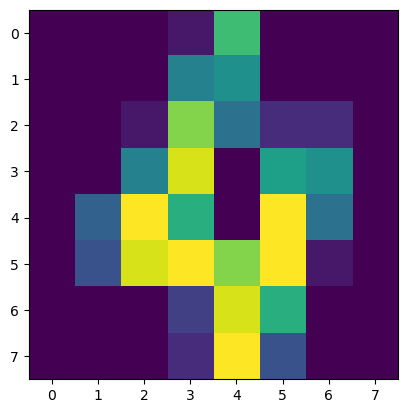

In [91]:
from sklearn import datasets

digits = datasets.load_digits()

print(digits.target[4])

plt.imshow(digits.data[4].reshape((8,8)))

**5. [0.1 балла]** Примените к матрице `digits.data` сингулярное разложение.

In [92]:
U, S, VT = svd(digits.data, full_matrices=False)

In [93]:
# digits.target[90]

**6. [0.65 балла]** Визуализируйте данные, спроецировав их на такую плоскость, чтобы координаты точек соответствовали первым двум новым признакам. Не забудьте покрасить точки, отвечающие различным цифрам, в разные цвета (если Вы любите красивые визуализации, разберитесь, как вместо точек рисовать маленькие цифры).

In [94]:
Sg = np.diag(S)
new_features = U @ Sg

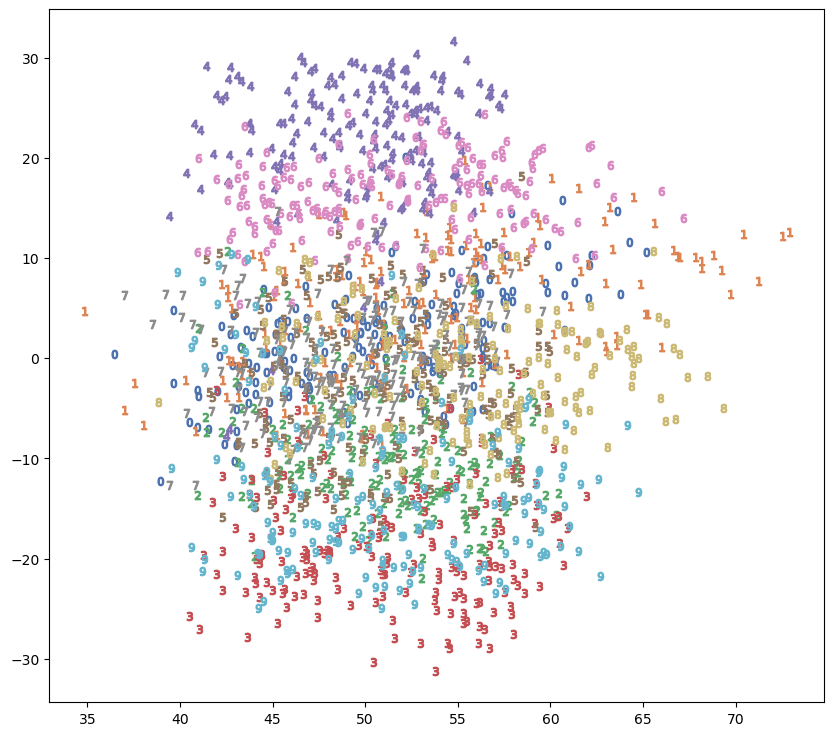

In [95]:
plt.figure(figsize=(10,9))
sns.set_palette('deep')

for i in range(10):
    plt.scatter(x=new_features[digits.target==i][:,:1].reshape(-1,), y=new_features[digits.target==i][:,1:2].reshape(-1,), marker=f'${str(i)}$')


**7. [0.25 балла]** Теперь вычтите из каждого признака его среднее значение, снова сделайте SVD и нарисуйте разноцветные точки.

In [96]:
data2 = np.empty((len(digits.data), len(digits.data[0])))  # создаем массив по заданным размерам
for i in range(len(digits.data[0])):
    data2[:,i:i+1] = digits.data[:,i:i+1] - digits.data[:,i:i+1].mean()

data2.shape

(1797, 64)

In [97]:
%%time
U1, S1, VT1 = svd(data2, full_matrices=False)
Sg1 = np.diag(S1)
new_features1 = U1 @ Sg1

CPU times: total: 46.9 ms
Wall time: 6.94 ms


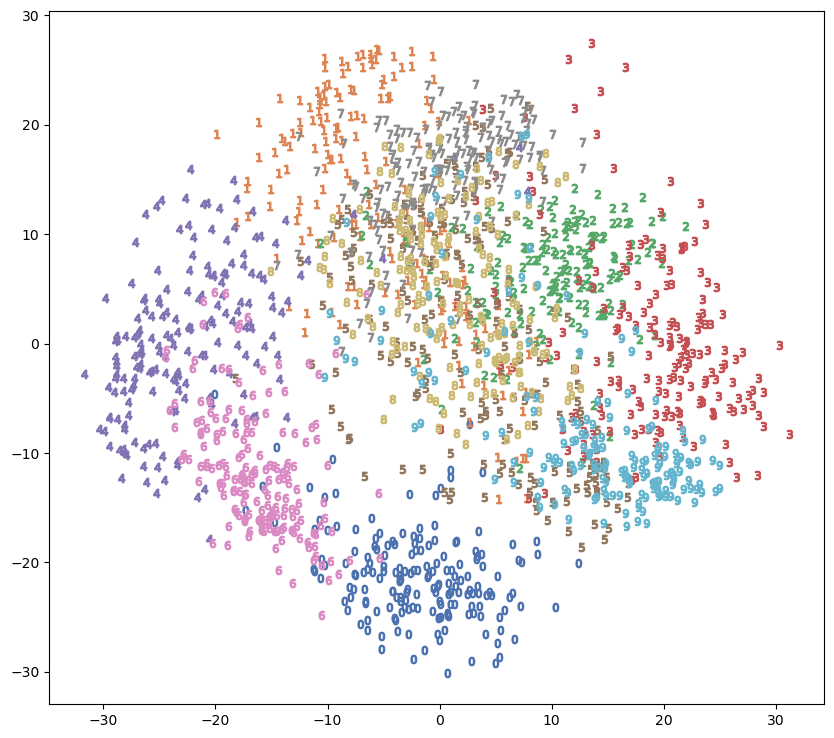

In [98]:
plt.figure(figsize=(10,9))
sns.set_palette('deep')

for i in range(10):
    plt.scatter(x=new_features1[digits.target==i][:,:1].reshape(-1,), y=new_features1[digits.target==i][:,1:2].reshape(-1,), marker=f'${str(i)}$')


**8. [0.25 балла]** Сравните выполненные Вами в двух предыдущих пунктах визуализации. Чем последняя выгодно отличается от первой?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ\
На последней визуализации каждой цифре соответсвует более обособленная группа, то есть по данному изображению можно более точно классифицировать объекты

**9. [1 балл]** Сравните работу SVD с другим методом понижения размерности: [случайными гауссовскими проекциями](http://scikit-learn.org/stable/modules/generated/sklearn.random_projection.GaussianRandomProjection.html).

*Комментарий: Эксперименты без выводов, объясняющих полученные результаты, не оцениваются. Для получения полного балла за этот пункт постарайтесь провести как можно больше разноплановых экспериментов.*

In [99]:
from sklearn import random_projection

In [100]:
%%time

grp = random_projection.GaussianRandomProjection(n_components=2, random_state=0)
grp_data = grp.fit_transform(digits.data)

# print(grp_data.shape)

CPU times: total: 0 ns
Wall time: 1.69 ms


In [101]:
# from sklearn.decomposition import TruncatedSVD
# tsvd=TruncatedSVD(n_components=2)
# print(tsvd)

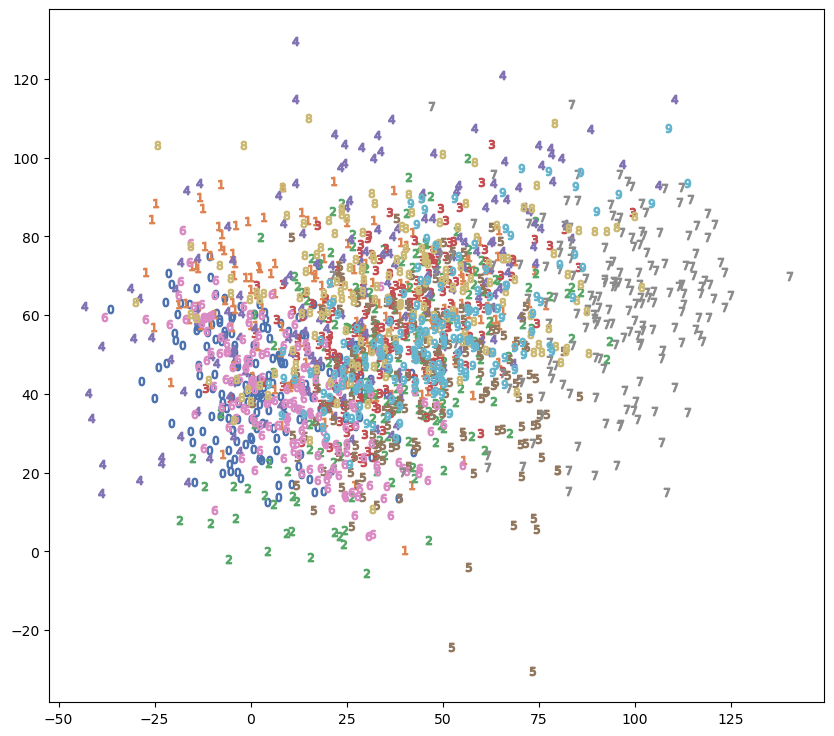

In [102]:
plt.figure(figsize=(10,9))
sns.set_palette('deep')

for i in range(10):
    plt.scatter(x=grp_data[digits.target==i][:,:1].reshape(-1,), y=grp_data[digits.target==i][:,1:2].reshape(-1,), marker=f'${str(i)}$')


**время работы** \
Для заданных данных SVD работает в среднем в 2 раза дольше, чем случайные гауссовские проекции (с ростом обоъема данных эти значения могут отличаться сильнее).

**отдаленность групп друг от друга** \
SVD (особенно с вычитанием среднего из каждого признака) позволяет построить графики с более отдаленными друг от друга группами.

**диспресия значений признаков** \
При SVD значения полученных новых признаков колеблются преимущественно в диапазоне от -30 до 30, в то время как случайные гауссовские проекции сильно расширяют этот диапазон.


### Задание 3. Когда SVD не сработает

**Disclaimer**

Цель этого задания — познакомить Вас не только с геометрическим смыслом сингулярного разложения, но и перекинуть очередной мостик между линейной алгеброй и анализом данных. К сожалению, на том берегу Вас встретят разные пока неизведанные понятия; мы постараемся по возможности дать какие-то определения, но, конечно, нет никакой возможности изложить на этих страницах полный курс теории вероятностей. Поэтому какие-то вещи останутся недосказанными или необоснованными; если Вам будет интересно, не стесняйтесь читать соответствующую литературу или хотя бы Википедию, а если нет, то мы надеемся, что хотя бы наглядное представление у Вас сформируется. В любом случае, нам хотелось бы, чтобы воспоминания об этом всколыхнулись в ваших головах, когда Вы будете это всё изучать в курсе по теории вероятностей.

Но начнём мы с того, что обсудим ситуацию, в которой SVD работает лучше всего: а именно, со случая, когда данные распределены нормально.

**Что такое плотность вероятности**

В дальнейшем Вам достаточно часто придётся сталкиваться со *случайными величинами*. Мы не будем сейчас пытаться строго определить, что это такое (для этого у вас будет целый курс по теории вероятностей), а остановимся только на одном его аспекте.

Если случайная величина $X$ принимает лишь конечное (или счётное) число значений $x_1,x_2,\ldots$, то чтобы задать её, достаточно описать, с какой вероятностью $X$ равна $x_i$: 

$$p_i = P(X = x_i)$$

таким образом, чтобы $\sum_ip_i = 1$. Если же $X$ принимает значения на каком-либо отрезке или на всей числовой прямой, то так уже не получится: в этом случае вероятность того, что $X$ равна какому-то конкретному $x_0$, обычно равна нулю. Как правило, заменой вероятностей $p_i$ служит *функция плотности распределения* $p(x)$. Смысл её таков:

$$P(\alpha\leqslant X\leqslant\beta) = \int\limits_{\alpha}^{\beta}p(x)dx$$

(в левой части стоит вероятность того, что значение $X$ лежит на отрезке $[\alpha,\beta]$).

Таким образом, функция $p(x)$ действительно играет роль "плотности": вероятность попасть в отрезок одной и той же длины тем выше, чем больше значения $p(x)$ на нём.

**Нормальное распределение**

Одним из самых важных примеров непрерывных распределений является *нормальное распределение*. Его плотность имеет вид

$$p(x) = \frac1{\sqrt{2\pi\sigma^2}}e^{-\frac{(x - a)^2}{2\sigma^2}}$$

У него есть два параметра:

- $a$ - *математическое ожидание*, имеющее смысл среднего значения и для нормального распределения совпадающее с центром симметрии распределения;
- $\sigma^2$ - *дисперсия*: чем она меньше, тем в большей степени распределение сконцентрировано подле своего математического ожидания

Нормальное распределение с параметрами $a$ и $\sigma^2$ можно кратко обозначать $\mathcal{N}(a, \sigma^2)$.

Чтобы проиллюстрировать это, мы сгененерируем много точек из распределений $\mathcal{N}(2, 0.25)$, $\mathcal{N}(0, 1)$ и $\mathcal{N}(0, 4)$ и по ним в каждом из этих случаев построим аппроксимацию функции плотности распределения. Обратите внимание, что параметр $a$ в `numpy` называется `loc`, $\sigma$ (без квадрата!) — `scale`

In [103]:
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
%matplotlib inline

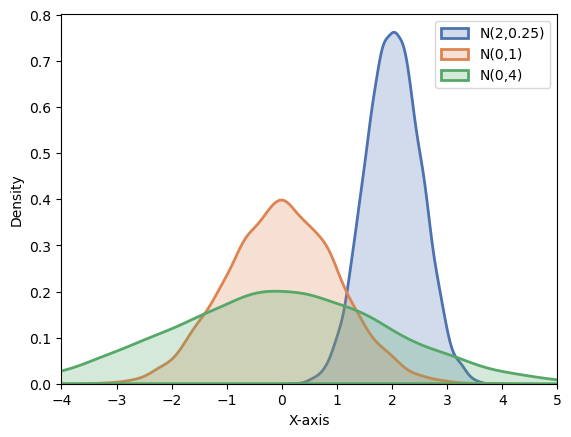

In [104]:
N = 10000

# Generate data samples
s1 = np.random.normal(loc=2, scale=0.5, size=N)
s2 = np.random.normal(loc=0, scale=1, size=N)
s3 = np.random.normal(loc=0, scale=2, size=N)

# Create an axes-level plot using kdeplot with manually specified labels
sns.kdeplot(data=s1, fill=True, linewidth=2, label='N(2,0.25)')
sns.kdeplot(data=s2, fill=True, linewidth=2, label='N(0,1)')
sns.kdeplot(data=s3, fill=True, linewidth=2, label='N(0,4)')

# Manually set the legend labels
legend_labels = ['N(2,0.25)', 'N(0,1)', 'N(0,4)']
plt.legend(labels=legend_labels)

plt.xlim([-4, 5])
plt.xlabel('X-axis')
plt.ylabel('Density')
plt.show()


**Функция плотности распределения в многомерном случае**

Если значения случайной величины $X$ — это многомерные векторы, функция плотности сохраняет примерно тот же смысл: если $\Omega\subseteq\mathbb{R}^n$, то

$$P(X\in\Omega) = \int\limits_{\Omega}p(x)dx$$

**Многомерное нормальное распределение**

Многомерное нормальное распределение определяется также двумя параметрами: *вектором средних* $a$ и положительно определённой *ковариационной матрицей* $\Sigma$; оно имеет плотность

$$p(x) = \frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}$$

где, напомним, $x$ — вектор из $\mathbb{R}^n$. Компоненты вектора $a$ — это математические ожидания отдельных координат $X$, а на диагонали матрицы $\Sigma$ стоят их *дисперсии* (настоящие, без кавычек). Вне диагонали стоят *ковариации* компонент $X$ (пока вам достаточно понимать, что если они равны нулю, то эти компоненты независимы$^1$).

---
$^1$ Точнее сказать, некоррелированны, однако для компонент многомерного нормального распределения независимость и некоррелированность равносильны (на самом деле редкое и удачное свойство!).

**Несколько фактов**

* Под (n-1)-мерным эллипсоидом будем понимать гиперповерхность в $\mathbb{R}^n$, такую что в некоторой прямоугольной декартовой системе координат её уравнение принимает вид $\sum_{i=1}^n \frac{x_i^2}{r_i^2} = 1$. Поверхности уровня $p(x) = c$ — это эллипсоиды.

*  Пользуясь теоремой о приведении квадратичной формы к главным осям, можно показать, что функция плотности многомерного нормального распределения представляется в виде произведения одномерных нормальных плотностей при переходе в новую систему координат. 
$$p(x)=\frac1{(2\pi)^{n/2}|\Sigma|^{1/2}}e^{-\frac12(x - a)^T\Sigma^{-1}(x - a)}\:\underset{\text{новая система координат}}{\to}\: p(x)=p(x_1)\cdot ...\cdot p(x_n)$$

    В частности, это означает, что с помощью замены координат можно добиться того, чтобы отдельные компоненты были независимы (то есть матрица ковариации $\Sigma$ диагональна).

А мы тем временем продемонстрируем это на конкретном примере, сгенерировав много точек из двумерного нормального распределения с вектором средних $(-1,3)$ и ковариационной матрицей

$$\begin{pmatrix}
1 & \frac32\\
\frac32 & 5
\end{pmatrix}$$

и нарисовав приближённо линии уровня функции плотности.

<Axes: >

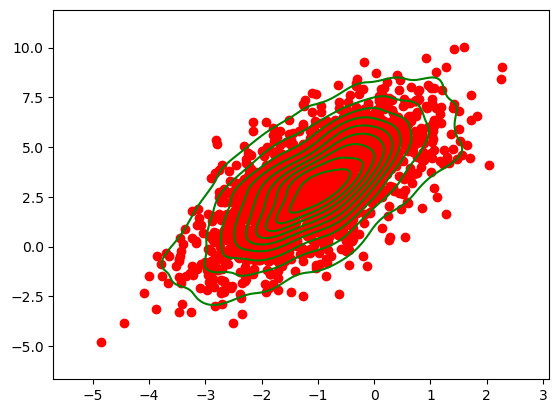

In [105]:
N = 2000
s = np.random.multivariate_normal(mean=np.array([-1,3]), cov=np.array([[1,1.5],[1.5,5]]), size=N)
plt.scatter(s[:,0], s[:,1], color='red')
# sns.kdeplot(s, shade=False, color='g')
sns.kdeplot(data=s, x = s[:, 0], y = s[:, 1], fill=False, color='g')

Как видите, линии уровня весьма напоминают эллипсы (только напоминают, потому что точек у нас всё-таки конечное число).

**1. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (0,0)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & -2\\
-2 & 5
\end{pmatrix}.$$

In [106]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
N = 1000
X = np.random.multivariate_normal(mean=np.array([0,0]), cov=np.array([[1,-2],[-2,5]]), size=N)

**2. [0.25 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте на плоскости все точки $x_i$ и направления новых признаков. Убедитесь, что направления новых признаков примерно совпадают с направлениями полуосей эллипса, образованного точками.

[[ 0.38320418 -0.92366366]
 [ 0.92366366  0.38320418]]


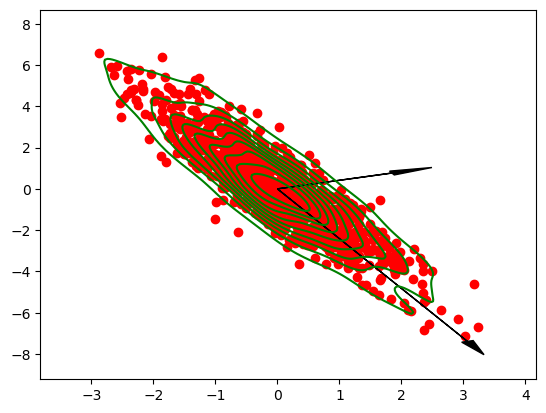

In [107]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
U, S, VT = svd(X, full_matrices=False)
plt.scatter(X[:,0], X[:,1], color='red')
sns.kdeplot(data=X, x = X[:, 0], y = X[:, 1], fill=False, color='g')

plt.arrow(0, 0, 8 * VT[0][0], 8 * VT[0][1], head_width=0.2, head_length=0.7, facecolor='black', edgecolor='black')
plt.arrow(0, 0, 2 * VT[1][0], 2 * VT[1][1], head_width=0.2, head_length=0.7, facecolor='black', edgecolor='black')

print(VT)

**3. [0.5 балла]** Приведите к главным осям матрицу ковариации (это нужно сделать без привлечения `Python`) и убедитесь, что направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ\
Рассмотрим линейный оператор $\phi$, матрица которого совпадает с матрицей ковариации $\Sigma$.
Найдем характеристический многочлен:

$$\begin{vmatrix}
1-t  & -2\\
-2 & 5-t
\end{vmatrix} = t^2-6t+1 = -(-t + 2 \sqrt{2} + 3) (t + 2 \sqrt{2} - 3)$$\
$t_1 = 2 \sqrt{2} + 3 \\
t_2 = - 2 \sqrt{2} + 3
$

$\text{Ker}$($\phi - t_1 \cdot E$):
$$e_1 = \begin{pmatrix}
\frac{1-\sqrt{2}}{4-2\sqrt{2}}\\
\frac{1}{4-2\sqrt{2}}
\end{pmatrix}$$

$\text{Ker}$($\phi - t_2 \cdot E$):
$$e_2 = \begin{pmatrix}
\frac{1+\sqrt{2}}{4+2\sqrt{2}}\\
\frac{1}{4+2\sqrt{2}}
\end{pmatrix}$$


In [108]:
from math import sqrt

[[-0.3535533905932739, 0.35355339059327373], [0.853553390593274, 0.14644660940672624]]


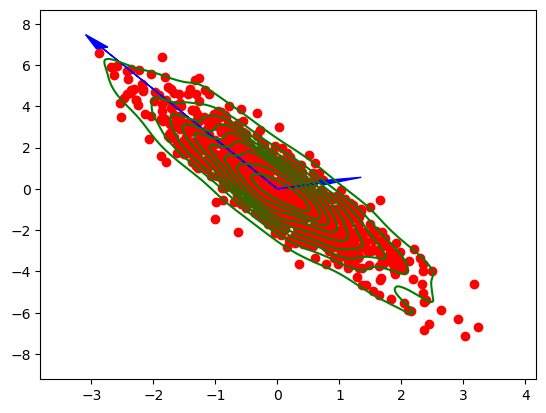

In [109]:
e = [[(1-sqrt(2))/(4-2*sqrt(2)), (1+sqrt(2))/(4+2*sqrt(2))], [1/(4-2*sqrt(2)), 1/(4+2*sqrt(2))]]

plt.scatter(X[:,0], X[:,1], color='red')
sns.kdeplot(data=X, x = X[:, 0], y = X[:, 1], fill=False, color='g')

plt.arrow(0, 0, 8 * e[0][0], 8 * e[1][0], head_width=0.2, head_length=0.7, facecolor='blue', edgecolor='blue')
plt.arrow(0, 0, 2 * e[0][1], 2 * e[1][1], head_width=0.2, head_length=0.7, facecolor='blue', edgecolor='blue')

print(e)

Действительно, направления этих осей тоже примерно совпадают с наблюдаемыми направлениями полуосей эллипсоида.

Как Вы могли убедиться, SVD хорошо справляется со своей работой, когда данные распределены нормально, а в других случаях может давать совсем не такие информативные (или даже не адекватные) результаты.

**4. [0.25 балла]** Сгенерируйте двумерную выборку, представляющую собой два расположенных рядом (см. пример ниже) длинных и узких не пересекающихся эллипса с центрами в точках $(-1,0)$ и $(1,0)$ и с параллельными направлениями полуосей. Иными словами, постарайтесь как можно точнее воспроизвести картинку ниже. 

C:\Users\avo_m\AppData\Local\Temp\ipykernel_24604\3532941678.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  X1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov=np.array([[2,4],[-0.05,0.025]]), size=N1)
C:\Users\avo_m\AppData\Local\Temp\ipykernel_24604\3532941678.py:5: RuntimeWarning: covariance is not positive-semidefinite.
  X2 = np.random.multivariate_normal(mean=np.array([1,0]), cov=np.array([[2,4],[-0.05,0.025]]), size=N2)


<Axes: >

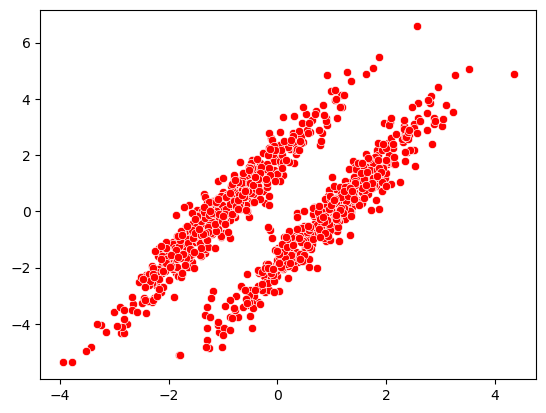

In [112]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
N1 = 500
X1 = np.random.multivariate_normal(mean=np.array([-1,0]), cov=np.array([[2,4],[-0.05,0.025]]), size=N1)
N2 = 500
X2 = np.random.multivariate_normal(mean=np.array([1,0]), cov=np.array([[2,4],[-0.05,0.025]]), size=N2)
X = np.vstack([X1, X2])

sns.scatterplot(x=X[:,0].reshape(-1,), y=X[:,1].reshape(-1,), color='red')
# sns.set_style('whitegrid')

**5. [0.1 балла]** Сделайте SVD и нарисуйте направления новых признаков.

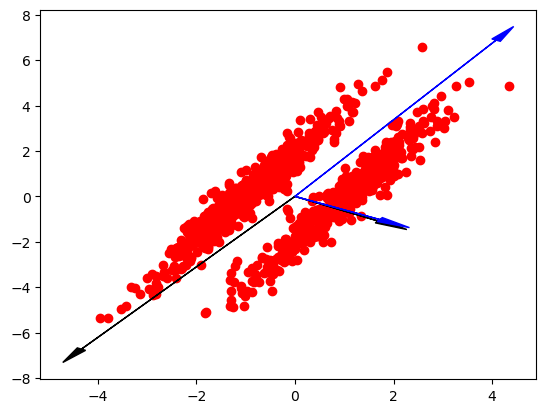

In [113]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
U1, S1, VT1 = svd(X1, full_matrices=False)
U2, S2, VT2 = svd(X2, full_matrices=False)

plt.scatter(X[:,0], X[:,1], color='red')

plt.arrow(0, 0, 8 * VT1[0][0], 8 * VT1[0][1], head_width=0.2, head_length=0.7, facecolor='black', edgecolor='black')
plt.arrow(0, 0, 2 * VT1[1][0], 2 * VT1[1][1], head_width=0.2, head_length=0.7, facecolor='black', edgecolor='black')
plt.arrow(0, 0, 8 * VT2[0][0], 8 * VT2[0][1], head_width=0.2, head_length=0.7, facecolor='blue', edgecolor='blue')
plt.arrow(0, 0, 2 * VT2[1][0], 2 * VT2[1][1], head_width=0.2, head_length=0.7, facecolor='blue', edgecolor='blue')

Если бы мы решали задачу анализа данных, то скорее всего нас интересовал признак, который бы разделял два кластера (в данном случае два эллипса), то есть такая функция $f(x)$, для которой
$$f(x) < c,\ \mbox{если объект $x$ из первого класса}$$
$$f(x) > c,\ \mbox{если объект $x$ из второго класса}$$
для некоторого числа $c$.

**6. [0.25 балла]** Помогает ли какой-нибудь из двух предоставленных SVD признаков обнаружить эту структуру? Обязательно поясните свой ответ.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
Ни один из признаков не разделяет два кластера, поскольку для признаков вдоль одной из полуосей эллипсов при любом фиксированном значении есть экземпляры как одного, так и другого класса, а по другой оси - направленность признаков не позволяет найти необходимое значение с, чтобы разделить на два класса (тк они нправлены от точки (0, 0), соответсвенно, от противоположного класса)

In [114]:
# Just keep this image as a sample

**7. [0 баллов]** Сгенерируйте выборку из 1000 точек $x_1,\ldots,x_{1000}$ из нормального распределения с вектором средних $a = (1,1)$ и ковариационной матрицей

$$\Sigma = \begin{pmatrix}
1 & 0\\
0 & 4
\end{pmatrix}.$$

In [115]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
N=1000
X = np.random.multivariate_normal(mean=np.array([1,1]), cov=np.array([[1,0],[0,4]]), size=N)

**8. [0.2 балла]** Очевидно, что "интересными" для этого датасета направлениями будут направления полуосей эллипса-облака точек. Глядя только на матрицу $\Sigma$, определите, что это будут за направления? Поясните свой ответ.

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ\
Будут направления полуосей эллипса-облака точек, совпадающие со стандартной декартовой системой координат, поскольку происходит растяжение векторов стандартного базиса

**9. [0.1 балла]** Сделайте SVD-разложение $X = U\Sigma V^T$. Нарисуйте все точки $x_i$ на плоскости и направления новых признаков.

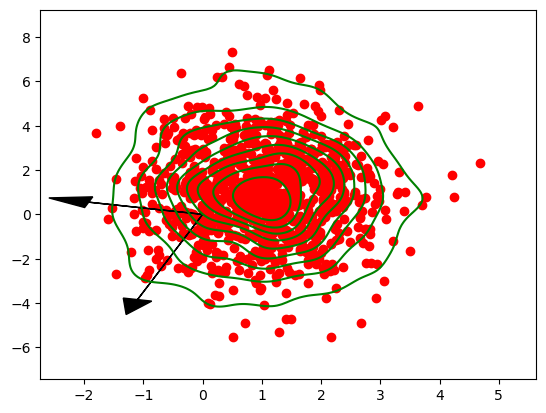

In [116]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
U, S, VT = svd(X, full_matrices=False)
plt.scatter(X[:,0], X[:,1], color='red')
sns.kdeplot(data=X, x = X[:, 0], y = X[:, 1], fill=False, color='g')

plt.arrow(0, 0, 4 * VT[0][0], 4 * VT[0][1], head_width=0.5, head_length=0.7, facecolor='black', edgecolor='black')
plt.arrow(0, 0, 2 * VT[1][0], 2 * VT[1][1], head_width=0.5, head_length=0.7, facecolor='black', edgecolor='black')


**10. [0.4 балла]** Сделайте вывод: в чём проблема и как можно её исправить?

╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ\
Проблема в том, что наибольшая плотность точек приходится не на (0, 0). Это можно исправить тем, что из каждого признака вычетать его среднее значение.